# CR Nonconforming Element for Poisson Equation in 2D

This example is to show the rate of convergence of the CR Nonconforming finite element approximation of the Poisson equation on the unit square:

$$- \Delta u = f \; \hbox{in } (0,1)^2$$

for the following boundary conditions
- Non-empty Dirichlet boundary condition: $u=g_D \hbox{ on }\Gamma_D, \nabla u\cdot n=g_N \hbox{ on }\Gamma_N.$
- Pure Neumann boundary condition: $\nabla u\cdot n=g_N \hbox{ on } \partial \Omega$.
- Robin boundary condition: $g_R u + \nabla u\cdot n=g_N \hbox{ on }\partial \Omega$.

**References**:
- [Quick Introduction to Finite Element Methods](femdoc.html)
- [Introduction to Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch2FEM.pdf)
- [Progamming of Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch3FEMCode.pdf)

**Subroutines**:

    - PoissonCR
    - squarePoisson
    - femPoisson
    - PoissonCRfemrate
    
The method is implemented in `PoissonCR` subroutine and can be tested in `squarePoisson`. Together with other elements (P1, P2, P3, Q1, CR), `femPoisson` provides a concise interface to solve Poisson equation. The CR element is tested in `PoissonCRfemrate`. This doc is based on `PoissonCRfemrate`.

## CR Nonconforming Element

We explain degree of freedoms and basis functions for Crouzeix-Raviart nonconforming P1 element on triangles. The dofs are associated to edges. Given a mesh, the required data structure can be constructured by

      [elem2edge,edge] = dofedge(elem);
      
### Local indexing      

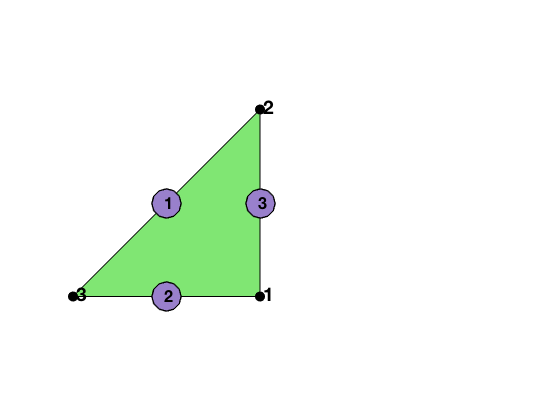

In [1]:
%% Local indexing of DOFs
node = [1,0; 1,1; 0,0];
elem = [1 2 3];
edge = [2 3; 3 1; 1 2];
figure;
subplot(1,2,1)
showmesh(node,elem);
findnode(node);
findedge(node,edge);

### A Local Basis

The 3 Lagrange-type bases functions are denoted by $\phi_i, i=1:3$, i.e. $\phi_i(m_j)=\delta _{ij},i,j=1:3$, where $m_i$ is the middle point of the i-th edge. In barycentric coordinates, they are:

$$\phi_i = 1- 2\lambda_i,\quad \nabla \phi_i = -2\nabla \lambda_i,$$

When transfer to the reference triangle formed by $(0,0),(1,0),(0,1)$, the local bases in x-y coordinate can be obtained by substituting 

$$\lambda _1 = x, \quad \lambda _2 = y, \quad \lambda _3 = 1-x-y.$$ 

### Local to global index map

The matrix `elem2edge` is the local to the global index mapping of edges. It can be constructed by 

    [elem2edge,edge] = dofedge(elem);


elem2edge =

  8�3 uint32 matrix

    5    6   15
   10   11   14
    2    1   13
    7    9   16
    7   15    8
    2   14    3
    5   13    4
   10   16   12



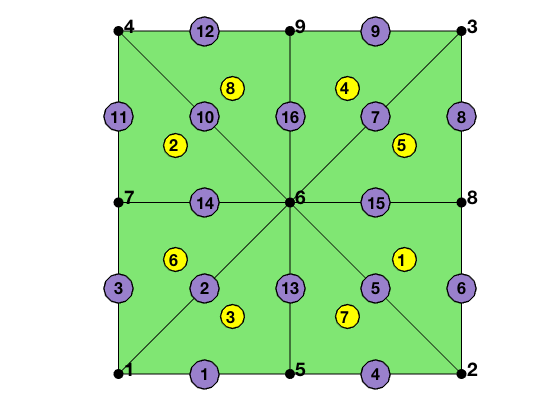

In [2]:
node = [0,0; 1,0; 1,1; 0,1];
elem = [2,3,1; 4,1,3];      
[node,elem] = uniformbisect(node,elem);
figure(2); clf;
showmesh(node,elem);
findnode(node);
findelem(node,elem);
[elem2edge,edge] = dofedge(elem);
findedge(node,edge);
display(elem2edge);

## Mixed boundary condition

In [3]:
%% Setting
[node,elem] = squaremesh([0,1,0,1],0.25); 
mesh = struct('node',node,'elem',elem);
option.L0 = 2;
option.maxIt = 4;
option.printlevel = 1;
option.plotflag = 1;
option.elemType = 'CR';

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     3136,  #nnz:    11040, smoothing: (1,1), iter: 12,   err = 2.67e-09,   time = 0.15 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    12416,  #nnz:    44608, smoothing: (1,1), iter: 12,   err = 2.62e-09,   time = 0.11 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    49408,  #nnz:   179328, smoothing: (1,1), iter: 12,   err = 2.57e-09,   time = 0.19 s

 #Dof       h        ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

  800   6.250e-02   1.20226e-03   1.62318e-01   3.64423e-02   1.55737e-03
 3136   3.125e-02   3.01351e-04   8.12476e-02   1.81858e-02   3.97664e-04
12416   1.562e-02   7.53872e-05   4.06349e-02   9.08851e-03   1.00099e-04
49408   7.812e-03   1.88499e-05   2.03188e-02   4.54371e-03   2.50778e-05

 #Dof   Assemble     Solve      Error      Mesh    

  800   6.00e-02   8.15e-03   8.00e-02   1.00e-02
 3136   6.00e-02   1.45e-01   3.00e-02   1.

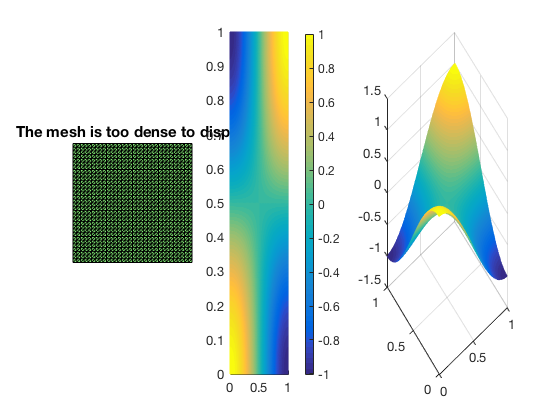

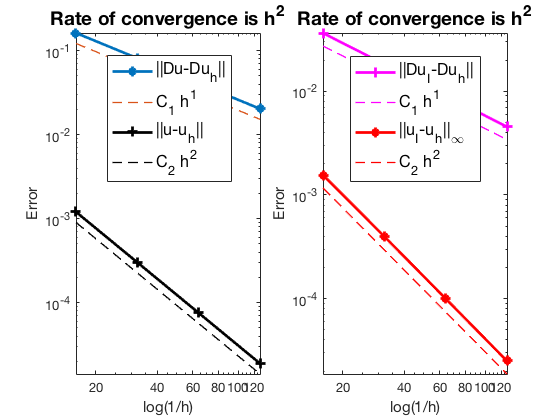

In [4]:
% Mixed boundary condition
pde = sincosdata;
mesh.bdFlag = setboundary(node,elem,'Dirichlet','~(x==0)','Neumann','x==0');
femPoisson(mesh,pde,option);

## Pure Neumann boundary condition

When pure Neumann boundary condition is posed, i.e., $-\Delta u =f$ in $\Omega$ and $\nabla u\cdot n=g_N$ on $\partial \Omega$, the data should be consisitent in the sense that $\int_{\Omega} f \, dx + \int_{\partial \Omega} g \, ds = 0$. The solution is unique up to a constant. A post-process is applied such that the constraint $\int_{\Omega}u_h dx = 0$ is imposed. 

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     3136,  #nnz:    11325, smoothing: (1,1), iter: 13,   err = 4.57e-09,   time = 0.058 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    12416,  #nnz:    45181, smoothing: (1,1), iter: 14,   err = 1.91e-09,   time = 0.058 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    49408,  #nnz:   180477, smoothing: (1,1), iter: 14,   err = 3.96e-09,   time = 0.16 s

 #Dof       h        ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

  800   6.250e-02   5.18787e-03   6.47906e-01   1.49052e-01   6.33147e-03
 3136   3.125e-02   1.30793e-03   3.24817e-01   7.31524e-02   1.60037e-03
12416   1.562e-02   3.27672e-04   1.62518e-01   3.64052e-02   4.01216e-04
49408   7.812e-03   8.19609e-05   8.12726e-02   1.81812e-02   1.00375e-04

 #Dof   Assemble     Solve      Error      Mesh    

  800   6.00e-02   6.22e-04   2.00e-02   0.00e+00
 3136   1.00e-02   5.78e-02   2.00e-02   

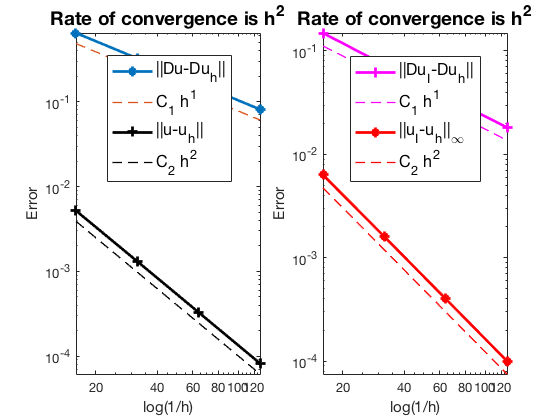

In [5]:
option.plotflag = 0;
pde = sincosNeumanndata;
mesh.bdFlag = setboundary(node,elem,'Neumann');
femPoisson(mesh,pde,option);

## Robin boundary condition

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     3136,  #nnz:    11328, smoothing: (1,1), iter: 12,   err = 1.82e-09,   time = 0.059 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    12416,  #nnz:    45184, smoothing: (1,1), iter: 11,   err = 9.89e-09,   time = 0.056 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    49408,  #nnz:   180480, smoothing: (1,1), iter: 12,   err = 1.78e-09,   time = 0.19 s

 #Dof       h        ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

  800   6.250e-02   5.14818e-03   6.47717e-01   1.48743e-01   6.97115e-03
 3136   3.125e-02   1.29781e-03   3.24794e-01   7.31131e-02   1.75333e-03
12416   1.562e-02   3.25127e-04   1.62515e-01   3.64002e-02   4.38609e-04
49408   7.812e-03   8.13241e-05   8.12722e-02   1.81806e-02   1.09622e-04

 #Dof   Assemble     Solve      Error      Mesh    

  800   6.00e-02   6.97e-04   1.00e-02   0.00e+00
 3136   1.00e-02   5.89e-02   1.00e-02   

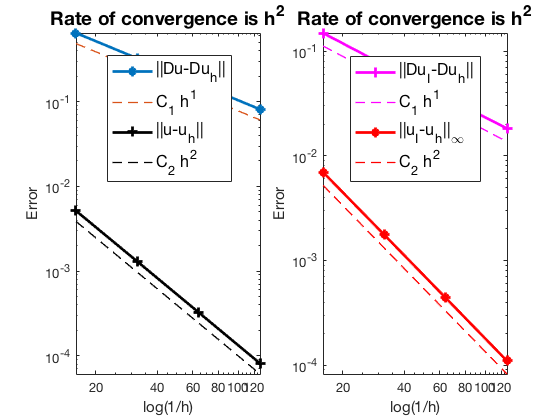

In [6]:
option.plotflag = 0;
pde = sincosRobindata;
mesh.bdFlag = setboundary(node,elem,'Robin');
femPoisson(mesh,pde,option);

## Conclusion

The optimal rate of convergence of the H1-norm (1st order) and L2-norm (2nd order) is observed. No superconvergence for $\|\nabla u_I - \nabla u_h\|$.

MGCG converges uniformly in all cases.